In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the saved image data
loaded_data = torch.load('/home/alphabet/DL-PF/singlecoil_codes/generated_dataset/test/0_87.pth')

# Extract k-space and label from the loaded data
kspace = loaded_data['k-space']
label = loaded_data['label']



In [2]:
np.array(label).shape

(2, 256, 256)

In [3]:
# Reshape the k-space and label arrays if necessary
label = np.array(label).reshape(2, 256, 256)
kspace = np.array(kspace)

# Inverse Fourier Transform to convert k-space to image space
kspace_C = kspace[0] + 1j * kspace[1]
image = np.fft.ifft2(kspace_C)

In [4]:
kspace_magnitude = np.abs(kspace_C)
kspace_normalized = (kspace_magnitude - kspace_magnitude.min()) / (kspace_magnitude.max() - kspace_magnitude.min())


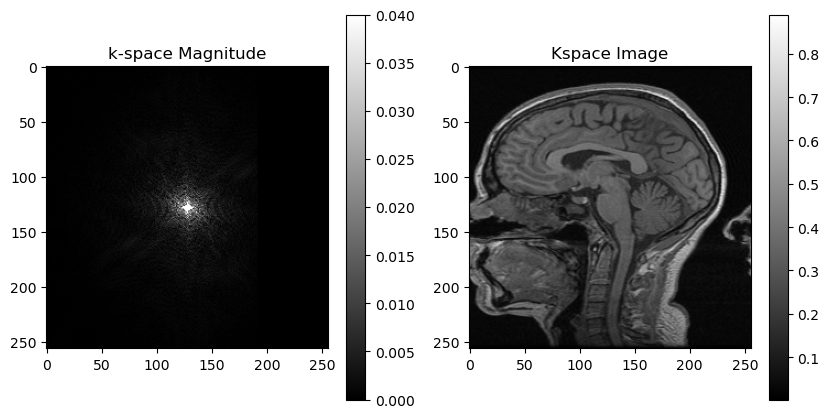

In [5]:
# Plotting k-space
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.fft.fftshift(kspace_normalized), cmap='gray', vmin=0, vmax=0.04)
plt.title('k-space Magnitude')
plt.colorbar()

# Plotting image space
plt.subplot(1, 2, 2)
plt.imshow(np.abs(image), cmap='gray')
plt.title('Kspace Image')
plt.colorbar()

plt.show()